In [0]:
import time
import autograd.numpy as np 
import matplotlib.pyplot as plt 
from autograd import grad

In [0]:
import autograd.numpy.random as npr

In [0]:
nx = 10
dx = 1. / nx

In [0]:
#d2(psy)/dx2 = f(x, dpsy/dx, psy)
def f(x, psy, dpsy):
   return -1./5. * np.exp(-x/5.) * np.cos(x) - 1./5. * dpsy - psy

    
#Analytical solution of current problem
def psy_analytic(x):
  return np.exp(-x/5.) * np.sin(x)



In [0]:
x_space = np.linspace(0, 2, nx)    
y_space = psy_analytic(x_space)

In [0]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return xi + xi**2 * net_out

In [0]:
psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)

In [0]:
def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
        second_gradient_of_trial = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [0]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

In [0]:
#weigt update
for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.060240672541369625


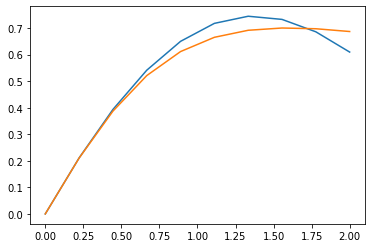

In [19]:
print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()